<a href="https://colab.research.google.com/github/Snehal0309/Student-Result-Management-System/blob/main/MedicalInsurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')
import io


In [3]:
from google.colab import files

uploaded= files.upload()


Saving Medicalpremium.csv to Medicalpremium (1).csv


In [9]:
df=pd.read_csv(io.BytesIO(uploaded['Medicalpremium.csv']))


In [10]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [12]:
print('Number of rows in the dataset',df.shape[0])
print('Number of columns in the dataset',df.shape[1])

Number of rows in the dataset 986
Number of columns in the dataset 11


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [14]:
#Updating the  datatype for object variable

for i in df[['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']] : 
     df[i]=df[i].astype('object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      986 non-null    int64 
 1   Diabetes                 986 non-null    object
 2   BloodPressureProblems    986 non-null    object
 3   AnyTransplants           986 non-null    object
 4   AnyChronicDiseases       986 non-null    object
 5   Height                   986 non-null    int64 
 6   Weight                   986 non-null    int64 
 7   KnownAllergies           986 non-null    object
 8   HistoryOfCancerInFamily  986 non-null    object
 9   NumberOfMajorSurgeries   986 non-null    object
 10  PremiumPrice             986 non-null    int64 
dtypes: int64(4), object(7)
memory usage: 84.9+ KB


df.isnull().sum()

dups=df.duplicated()
print('Number of duplicate records',dups.sum())

In [19]:
# Seprating the object and numeric variable
cat = []
num = []
for i in df.columns:
    if df[i].dtype=='object':
        cat.append(i)
    else:
        num.append(i)


In [20]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,986.0,41.745436,13.963371,18.0,30.0,42.0,53.0,66.0
Height,986.0,168.182556,10.098155,145.0,161.0,168.0,176.0,188.0
Weight,986.0,76.950304,14.265096,51.0,67.0,75.0,87.0,132.0
PremiumPrice,986.0,24336.713996,6248.184382,15000.0,21000.0,23000.0,28000.0,40000.0


In [21]:
for i in df[cat]:
    print(i ,df[i].nunique())
    print(df[i].value_counts())
    print('************************************************')

Diabetes 2
0    572
1    414
Name: Diabetes, dtype: int64
************************************************
BloodPressureProblems 2
0    524
1    462
Name: BloodPressureProblems, dtype: int64
************************************************
AnyTransplants 2
0    931
1     55
Name: AnyTransplants, dtype: int64
************************************************
AnyChronicDiseases 2
0    808
1    178
Name: AnyChronicDiseases, dtype: int64
************************************************
KnownAllergies 2
0    774
1    212
Name: KnownAllergies, dtype: int64
************************************************
HistoryOfCancerInFamily 2
0    870
1    116
Name: HistoryOfCancerInFamily, dtype: int64
************************************************
NumberOfMajorSurgeries 4
0    479
1    372
2    119
3     16
Name: NumberOfMajorSurgeries, dtype: int64
************************************************


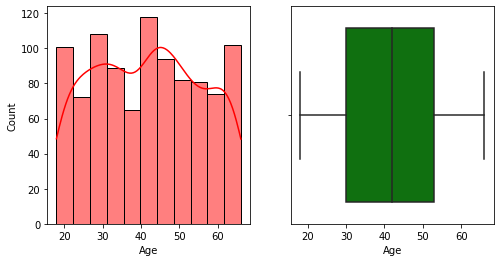

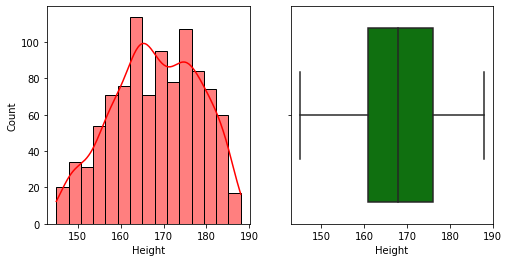

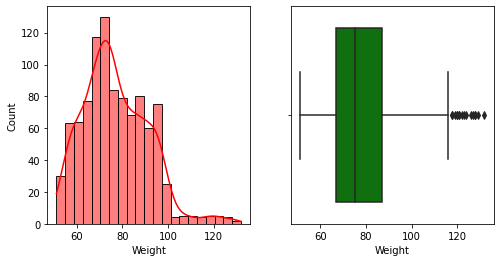

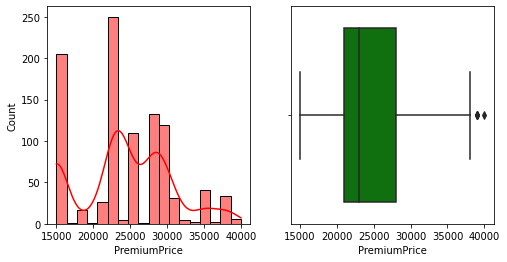

In [22]:
for i in df[num]:
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(8,4))
    sns.histplot(df[i],kde=True,ax=axes[0],color='red')
    sns.boxplot(df[i],ax=axes[1],color='green')

Text(0.5, 1.0, 'Distribution of Height of users')

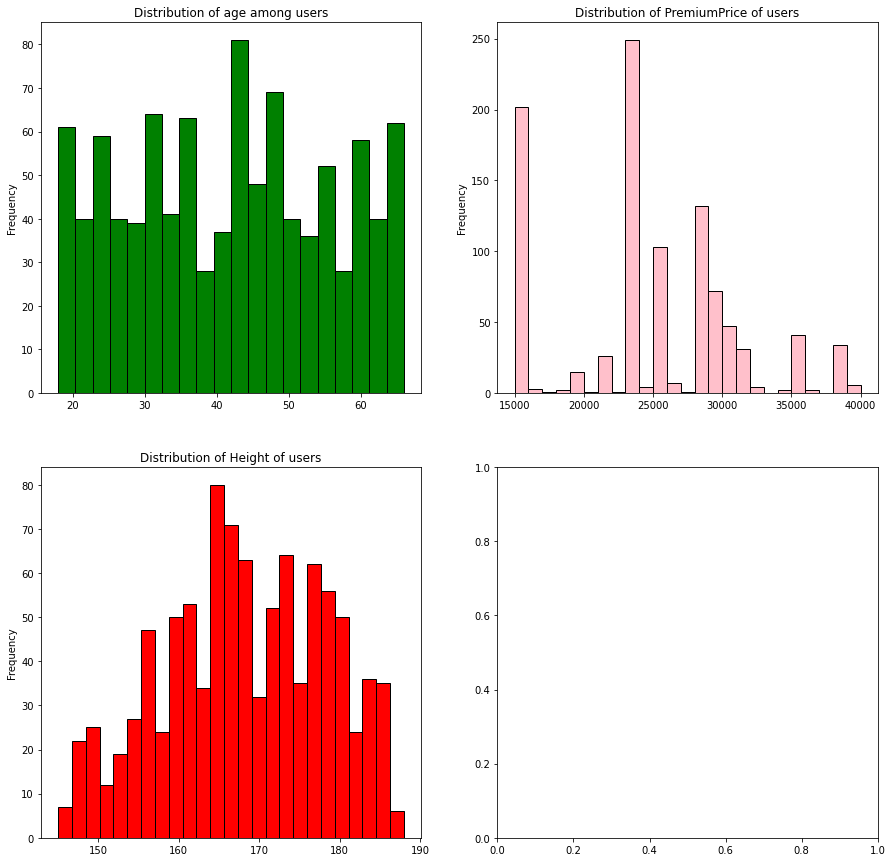

In [26]:
f,ax=plt.subplots(2,2,figsize=(15,15))
df.Age.plot.hist(bins = 20, edgecolor = 'black',color = 'green',ax=ax[0][0])
ax[0][0].set_title('Distribution of age among users')

df.PremiumPrice.plot.hist(bins = 25, edgecolor = 'black',color = 'pink',ax=ax[0][1])
ax[0][1].set_title('Distribution of PremiumPrice of users')

df.Height.plot.hist(bins = 25, edgecolor = 'black',color = 'red',ax=ax[1][0])
ax[1][0].set_title('Distribution of Height of users')

# df.Weight.plot.hist(bins = 25, edgecolor = 'black',color = 'violet',ax=ax[1][1])
# ax[1][1].set_title('Distribution of Weight of users')
# Text(0.5, 1.0, 'Distribution of Weight of users')

In [27]:
print('Distribution of Age')
print('Oldest User was of:',round(df['Age'].max()),'Years')
print('Youngest User was of:',round(df['Age'].min()),'Years')
print('Average Use age:',round(df['Age'].mean()),'Years')
print('**************************************************')

print('Distribution of Premium Price')
print('lowest Premium of a User was of:',round(df['PremiumPrice'].max()))
print('Youngest User was of:',round(df['PremiumPrice'].min()))
print('Average User Premium Price:',round(df['PremiumPrice'].mean()))
print('**************************************************')

print('Distribution of Height')
print('shortest Height of a User was of:',round(df['Height'].max()))
print('tallest User was of:',round(df['Height'].min()))
print('Average Height of  User:',round(df['Height'].mean()))
print('**************************************************')

Distribution of Age
Oldest User was of: 66 Years
Youngest User was of: 18 Years
Average Use age: 42 Years
**************************************************
Distribution of Premium Price
lowest Premium of a User was of: 40000
Youngest User was of: 15000
Average User Premium Price: 24337
**************************************************
Distribution of Height
shortest Height of a User was of: 188
tallest User was of: 145
Average Height of  User: 168
**************************************************


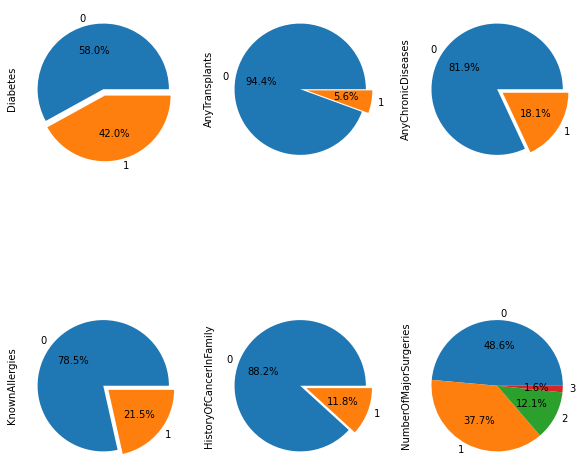

In [28]:
f,ax=plt.subplots(2,3,figsize=(10,10))
df['Diabetes'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0][0])
df['AnyTransplants'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0][1])
df['AnyChronicDiseases'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0][2])
df['KnownAllergies'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1][0])
df['HistoryOfCancerInFamily'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1][1])
df['NumberOfMajorSurgeries'].value_counts().plot.pie(explode=[0,0,0,0],autopct='%1.1f%%',ax=ax[1][2])

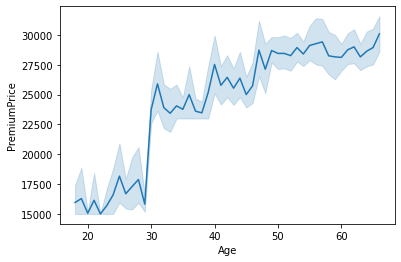

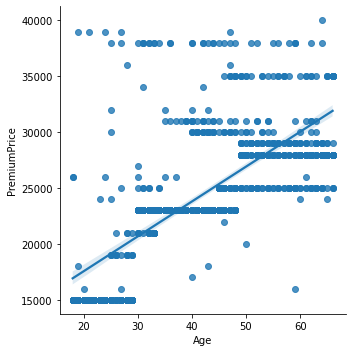

In [29]:
# Relation between Age and Premium Price.
sns.lineplot(df['Age'],df['PremiumPrice'])
sns.lmplot(x='Age', y ='PremiumPrice',data=df)

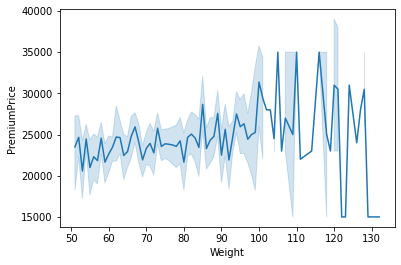

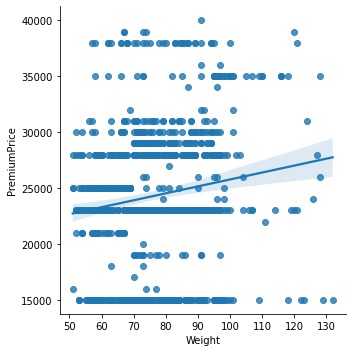

In [30]:
# Relation between Weight and Premium Price
sns.lineplot(df['Weight'],df['PremiumPrice'])
sns.lmplot(x='Weight', y ='PremiumPrice',data=df)

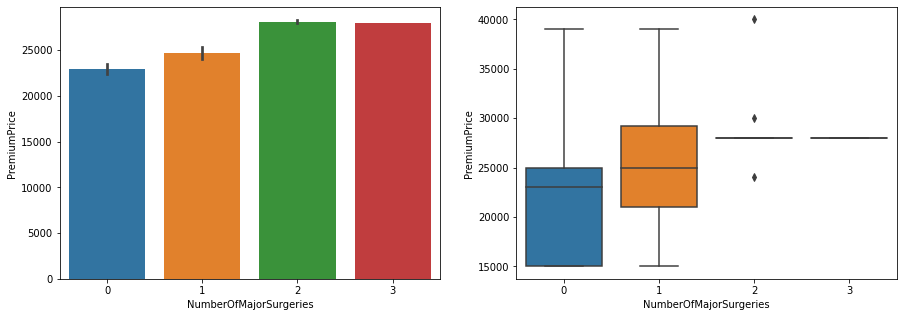

In [31]:
# Relation between Number Of Major Surgeries and Premium Price
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.barplot(data = df, x='NumberOfMajorSurgeries',y='PremiumPrice',ax=ax[0])
sns.boxplot(data = df, x='NumberOfMajorSurgeries',y='PremiumPrice',ax=ax[1])

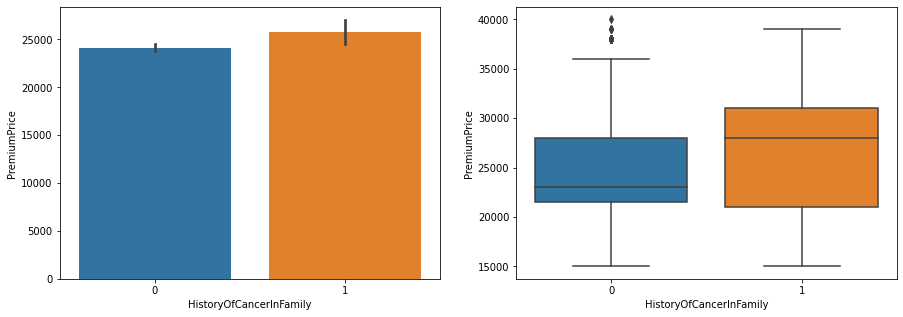

In [32]:
# Relation between History Of Cancer In Family and Premium Price
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.barplot(data = df, x='HistoryOfCancerInFamily',y='PremiumPrice',ax=ax[0])
sns.boxplot(data = df, x='HistoryOfCancerInFamily',y='PremiumPrice',ax=ax[1])

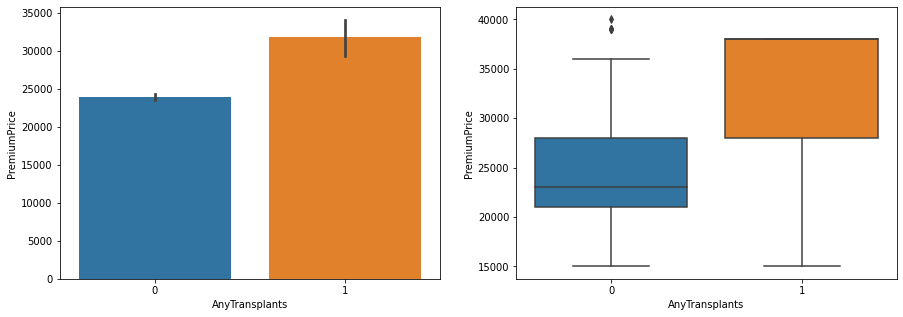

In [33]:
# Relation between Any Transplants In Family and Premium Price.
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.barplot(data = df, x='AnyTransplants',y='PremiumPrice',ax=ax[0])
sns.boxplot(data = df, x='AnyTransplants',y='PremiumPrice',ax=ax[1])

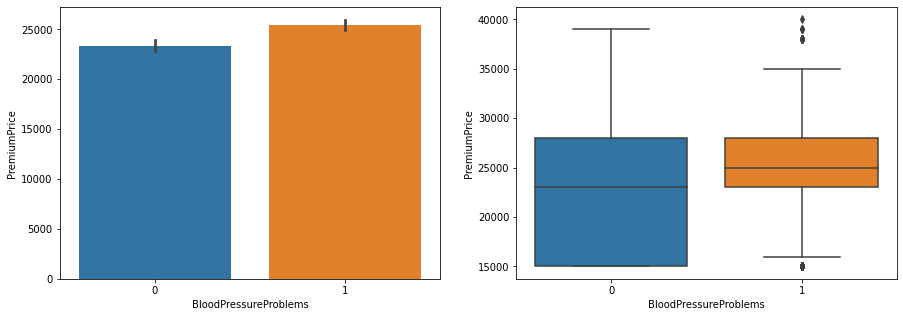

In [34]:
# Relation between Blood Pressure Problems In Family and Premium Price.
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.barplot(data = df, x='BloodPressureProblems',y='PremiumPrice',ax=ax[0])
sns.boxplot(data = df, x='BloodPressureProblems',y='PremiumPrice',ax=ax[1])

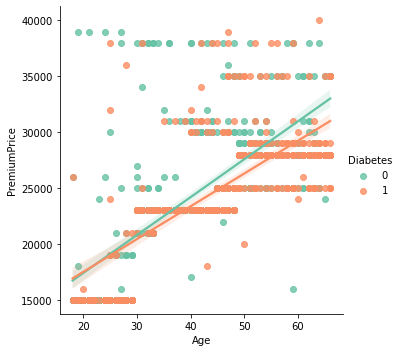

In [35]:
# Analyze the Premium Price by age according to the Diabetes
sns.lmplot(x = 'Age', y = 'PremiumPrice', data=df, hue='Diabetes', palette='Set2')

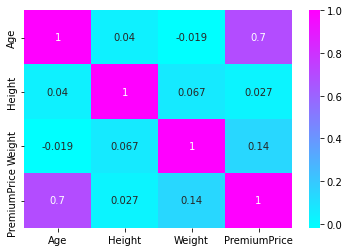

In [37]:
sns.heatmap(df.corr(),annot=True,cmap='cool')

In [38]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

In [39]:
# Dependent and Independent Features
X = df.drop('PremiumPrice',axis=1)
y = df.PremiumPrice

In [40]:
scalar =  StandardScaler()
X.Age = scalar.fit_transform(X[['Age']])
X.Height = scalar.fit_transform(X[['Height']])
X.Weight = scalar.fit_transform(X[['Weight']])

In [41]:
# Splitting the Dataset into 75 :25
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=43)

In [45]:
#Algorithm
#A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset 
# and uses averaging to improve the predictive accuracy and control over-fitting

Lr=RandomForestRegressor(n_estimators= 50,max_depth=5)
Lr_model=Lr.fit(X_train,y_train)

In [43]:
print('Accuracy of the model on training Dataset ',Lr_model.score(X_train,y_train))
print ('Accuracy of the model on Test Dataset ',Lr_model.score(X_test,y_test))

Accuracy of the model on training Dataset  0.8496001332949299
Accuracy of the model on Test Dataset  0.8166583370787521


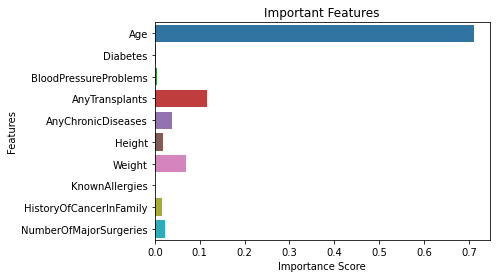

In [44]:
#Using the Feature importance to Extract the Importance of the Features.
feature_imp = Lr_model.feature_importances_
sns.barplot(x=feature_imp, y=X.columns)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title("Important Features")
plt.show();